In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\movie_dataset.csv")

# Display the first 10 rows.

In [3]:
df.head(10)

,MovieID,Title,Genre,Release_Year,Runtime_Minutes,Budget_MillionUSD,BoxOffice_MillionUSD,IMDB_Rating,RottenTomatoes_Rating,Country,Director,No_of_Awards,Production_Studio
0,1,Movie 1,Horror,2007,87,33.74,730.70,4.4,62,UK,Christopher Nolan,1,20th Century Fox
1,2,Movie 2,Adventure,2021,121,15.62,529.22,4.5,58,Germany,Quentin Tarantino,23,Disney
2,3,Movie 3,Romance,2018,139,46.67,430.73,7.9,67,Australia,James Cameron,13,20th Century Fox
3,4,Movie 4,Action,2003,101,181.16,342.33,8.8,55,Germany,Steven Spielberg,12,20th Century Fox
4,5,Movie 5,Thriller,2006,128,190.27,67.53,5.9,90,UK,Denis Villeneuve,27,Universal
5,6,Movie 6,Drama,2022,118,182.62,472.49,9.2,83,Canada,Quentin Tarantino,3,20th Century Fox
6,7,Movie 7,Sci-Fi,2023,164,56.63,385.33,5.1,86,Australia,Steven Spielberg,0,Disney
7,8,Movie 8,Horror,2018,133,89.86,475.88,6.1,85,UK,Martin Scorsese,6,Sony Pictures
8,9,Movie 9,Adventure,2024,102,180.48,754.74,8.9,32,Germany,Patty Jenkins,18,20th Century Fox
9,10,Movie 10,Drama,2016,111,152.38,686.62,7.2,38,USA,Martin Scorsese,4,20th Century Fox


# Dataset shape, column names, and data types.

In [4]:
df.shape

(300, 13)

In [5]:
df.columns

Index(['MovieID', 'Title', 'Genre', 'Release_Year', 'Runtime_Minutes',
       'Budget_MillionUSD', 'BoxOffice_MillionUSD', 'IMDB_Rating',
       'RottenTomatoes_Rating', 'Country', 'Director', 'No_of_Awards',
       'Production_Studio'],
      dtype='object')

In [6]:
df.dtypes

MovieID                    int64
Title                     object
Genre                     object
Release_Year               int64
Runtime_Minutes            int64
Budget_MillionUSD        float64
BoxOffice_MillionUSD     float64
IMDB_Rating              float64
RottenTomatoes_Rating      int64
Country                   object
Director                  object
No_of_Awards               int64
Production_Studio         object
dtype: object

# Find the number of movies released each year.

In [7]:
movies_each_year = df['Release_Year'].value_counts().sort_index()
print(movies_each_year)

Release_Year
2000     6
2001     8
2002    11
2003    20
2004     7
2005    12
2006    15
2007    10
2008     8
2009    12
2010    21
2011    10
2012    11
2013    14
2014    17
2015    12
2016     7
2017     6
2018    11
2019    14
2020    11
2021    15
2022    12
2023    10
2024    20
Name: count, dtype: int64


# What is the average runtime of movies?

In [8]:
avg_runtime_hours = round(df['Runtime_Minutes'].mean()/60,2)
print("average watching hours:",avg_runtime_hours)

average watching hours: 2.17


# Group movies by Genre and compute the average budget.

In [9]:
avg_budget_by_genre = (
    df.groupby('Genre')['Budget_MillionUSD'].mean().round(2)
)
print("Budget in million USD\n",avg_budget_by_genre)

Budget in million USD
 Genre
Action       128.29
Adventure    119.67
Comedy       122.79
Drama        128.41
Horror       134.11
Romance      121.10
Sci-Fi       132.54
Thriller     124.55
Name: Budget_MillionUSD, dtype: float64


# Find the movie with the highest IMDB rating.

In [10]:
Highest_IMDB_rating_movie = df.loc[df['IMDB_Rating'].idxmax(),['Title','IMDB_Rating']]
print(Highest_IMDB_rating_movie)

Title          Movie 33
IMDB_Rating         9.5
Name: 32, dtype: object


# Count movies produced by each Country.

In [11]:
Movie_by_country = df['Country'].value_counts().sort_values(ascending=False)
print(Movie_by_country)

Country
Australia    57
USA          47
Germany      45
UK           44
India        39
Canada       38
France       30
Name: count, dtype: int64


# Replace missing values (if any) in RottenTomatoes_Rating with the column mean.

In [52]:
if df['RottenTomatoes_Rating'].isna().sum() == 0:
    print("0 Missing Values")
else:
    df['RottenTomatoes_Rating'].isna().sum()

0 Missing Values


# Plot a histogram of IMDB ratings using Matplotlib.

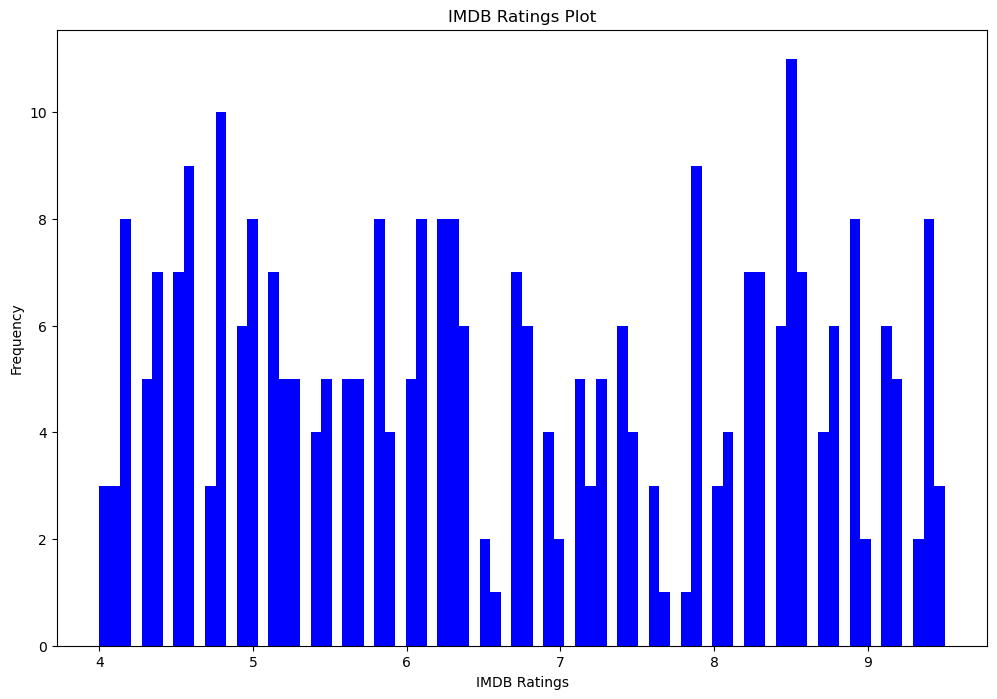

In [13]:
plt.figure(figsize=(12,8))
plt.hist(df['IMDB_Rating'],bins=80,color="blue")
plt.xlabel("IMDB Ratings")
plt.ylabel("Frequency")
plt.title("IMDB Ratings Plot")
plt.show()
# 10+ movie has rating 8.5 around & 6+8=14 movie has rating 9.0 above

# Use Seaborn to create a boxplot of BoxOffice_MillionUSD by Genre.

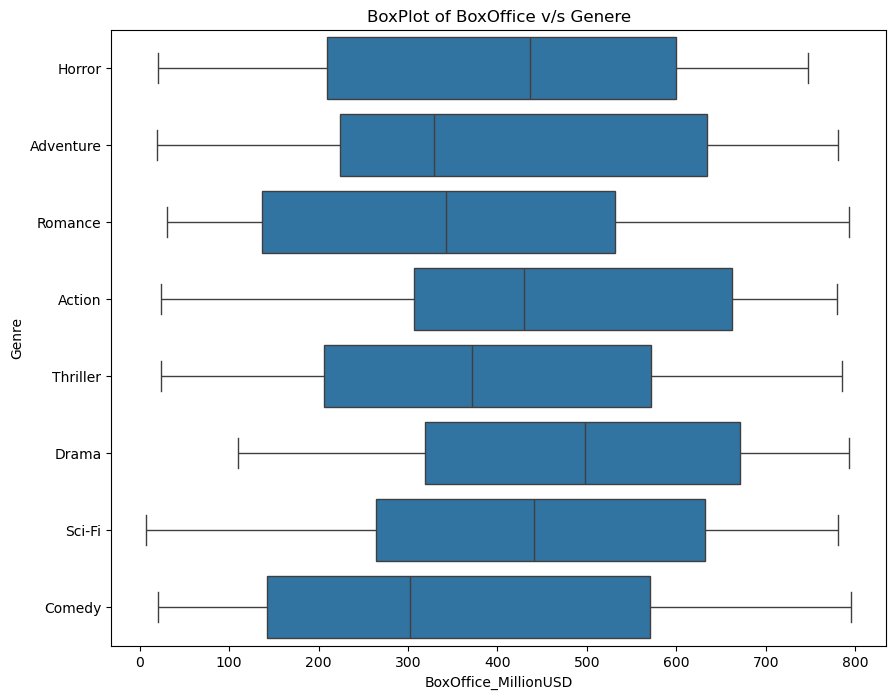

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot(x='BoxOffice_MillionUSD',y='Genre',data=df)
plt.xlabel('BoxOffice_MillionUSD')
plt.ylabel('Genre')
plt.title('BoxPlot of BoxOffice v/s Genere')
plt.show()

# Compute the correlation matrix and plot a heatmap.

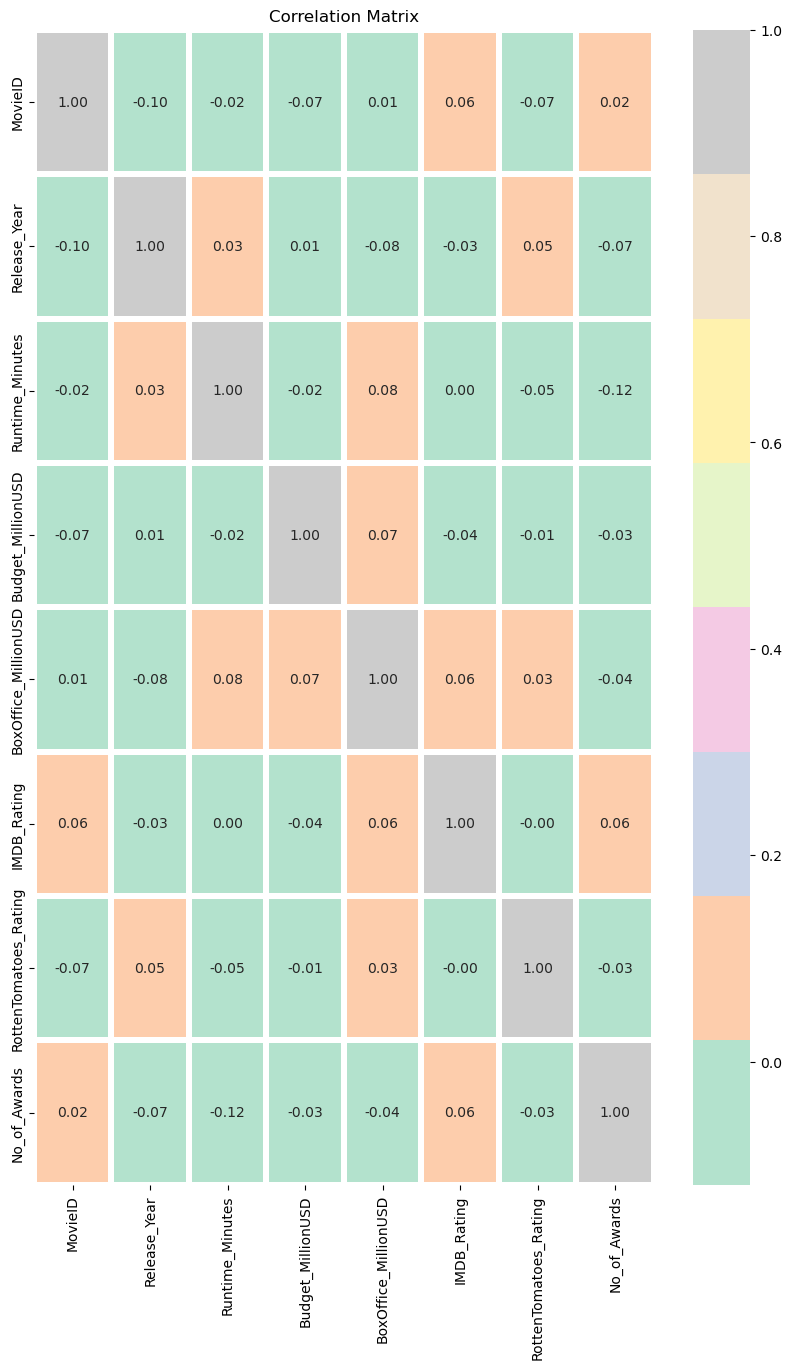

In [20]:
plt.figure(figsize=(10,15))
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='Pastel2',linewidths=3)
plt.title("Correlation Matrix")
plt.show()

# Find the top 10 highest-grossing movies.

In [23]:
Top_10_movies = df.sort_values(by='BoxOffice_MillionUSD',ascending=False).head(10)
print(Top_10_movies[['Title','Budget_MillionUSD','BoxOffice_MillionUSD','IMDB_Rating']])

         Title  Budget_MillionUSD  BoxOffice_MillionUSD  IMDB_Rating
230  Movie 231             115.95                795.16          7.2
167  Movie 168             207.30                793.40          7.4
89    Movie 90             152.53                793.39          4.5
158  Movie 159             171.98                787.76          8.0
72    Movie 73              77.88                785.30          7.4
280  Movie 281             226.33                780.80          6.3
261  Movie 262              62.58                780.51          8.1
85    Movie 86             178.56                780.22          4.9
66    Movie 67             107.02                779.63          8.5
60    Movie 61             249.68                778.40          5.0


# Create a new column : Profit = BoxOffice_MillionUSD - Budget_MillionUSD.

In [24]:
df['Profit'] = df['BoxOffice_MillionUSD'].fillna(0) - df['Budget_MillionUSD'].fillna(0)
print(df['Profit'])

0      696.96
1      513.60
2      384.06
3      161.17
4     -122.74
        ...  
295     53.23
296    543.90
297    159.11
298    458.22
299    437.26
Name: Profit, Length: 300, dtype: float64


# Which director has the highest average IMDB rating?

In [25]:
Director_avg_rating = (df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False))
Director_avg_rating.head(5)

Director
Steven Spielberg     6.958696
Martin Scorsese      6.955263
Quentin Tarantino    6.789744
Denis Villeneuve     6.659524
James Cameron        6.541667
Name: IMDB_Rating, dtype: float64

# Plot a scatterplot: Budget vs. BoxOffice, colored by Genre.

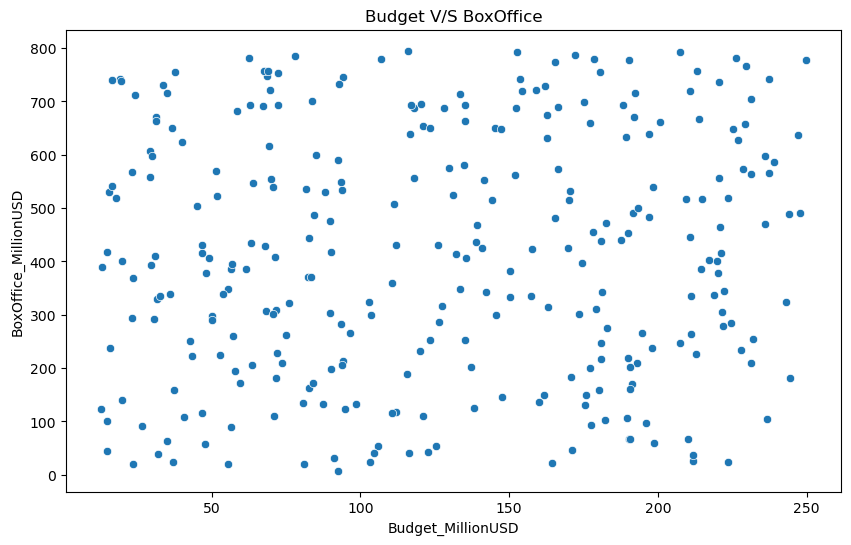

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Budget_MillionUSD'],y=df['BoxOffice_MillionUSD'])
plt.xlabel('Budget_MillionUSD')
plt.ylabel('BoxOffice_MillionUSD')
plt.title('Budget V/S BoxOffice')
plt.show()

# Calculate the average Rotten Tomatoes rating per year and plot it as a line chart.

In [30]:
Avg_RottenTomatoesRating = (df.groupby('Release_Year')['RottenTomatoes_Rating'].mean())

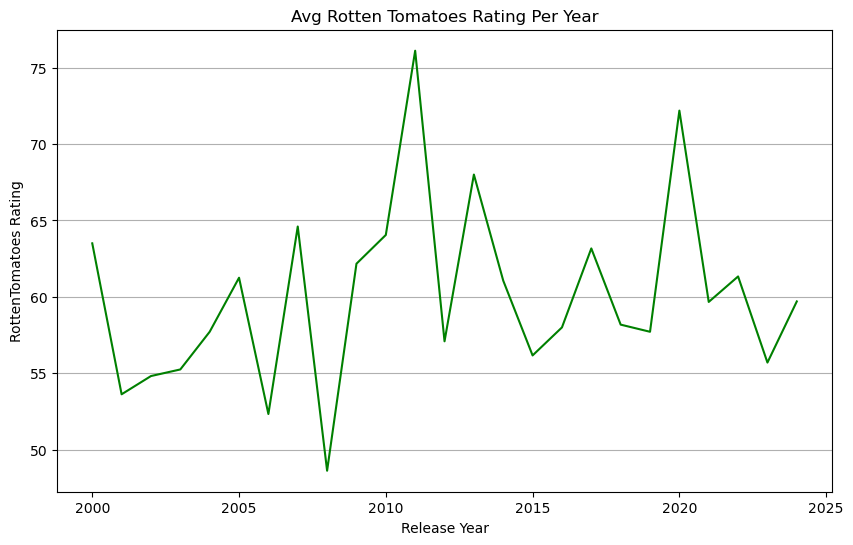

In [32]:
plt.figure(figsize=(10,6))
Avg_RottenTomatoesRating.plot(kind='line',color = 'green')
plt.title('Avg Rotten Tomatoes Rating Per Year')
plt.xlabel('Release Year')
plt.ylabel('RottenTomatoes Rating')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Which studio has produced the highest number of award-winning movies? (Award > 5)

In [35]:
Top_studio = (df[df['No_of_Awards']>5].groupby('Production_Studio').size().sort_values(ascending=False))
print(Top_studio)

Production_Studio
20th Century Fox    43
Universal           42
Sony Pictures       38
Paramount           32
Lionsgate           30
Disney              23
Warner Bros         22
dtype: int64


# Create a pivot table : (1)Rows: Genre, (2)Columns: Release_Year, (3)Values: Average Box Office

In [40]:
Pivot_table = pd.pivot_table(
                             df,
                             index='Genre',
                             columns='Release_Year',
                             values='BoxOffice_MillionUSD',
                             aggfunc='mean'
                            )
print(Pivot_table)

Release_Year        2000        2001     2002        2003     2004     2005  \
Genre                                                                         
Action        302.255000  403.856667  365.445  367.765000      NaN  231.520   
Adventure            NaN         NaN      NaN  627.490000  281.520  176.495   
Comedy               NaN  553.466667  638.630  474.196667  653.765      NaN   
Drama         649.870000         NaN  130.640  410.555000      NaN  564.450   
Horror        306.606667         NaN  471.320         NaN      NaN  433.855   
Romance              NaN  407.020000      NaN  297.730000      NaN  412.545   
Sci-Fi               NaN         NaN  693.470  290.050000  525.980  741.440   
Thriller             NaN  490.940000  543.400  302.316667  387.555  693.570   

Release_Year     2006        2007        2008     2009  ...        2015  \
Genre                                                   ...               
Action        348.700  387.740000  719.210000  762.395  ...

# Find the top 5 profitable movies.

In [42]:
Top5_profitable = df.sort_values(by='Profit',ascending=False).head(5)
print(Top5_profitable[['Title','Genre','Budget_MillionUSD','BoxOffice_MillionUSD','Release_Year','IMDB_Rating']])

         Title      Genre  Budget_MillionUSD  BoxOffice_MillionUSD  \
174  Movie 175     Sci-Fi              16.39                740.60   
275  Movie 276     Sci-Fi              19.16                741.44   
292  Movie 293     Comedy              19.61                738.19   
261  Movie 262     Sci-Fi              62.58                780.51   
123  Movie 124  Adventure              37.75                754.67   

     Release_Year  IMDB_Rating  
174          2019          7.4  
275          2005          7.1  
292          2004          6.7  
261          2024          8.1  
123          2018          4.5  


# Using NumPy, calculate the z-score for the IMDB_Rating column.

In [48]:
Mean_rating = np.mean(df['IMDB_Rating'])
Std_rating = np.std(df['IMDB_Rating'])
df['IMDB_Z-Score'] = (df['IMDB_Rating'] - Mean_rating)/Std_rating

In [50]:
df[['IMDB_Rating', 'IMDB_Z-Score']].head()


,IMDB_Rating,IMDB_Z-Score
0,4.4,-1.375798
1,4.5,-1.314886
2,7.9,0.756120
3,8.8,1.304328
4,5.9,-0.462119
